In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize images to the range [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_test = (x_test.astype(np.float32) - 127.5) / 127.5

# Reshape images to (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train = x_train[:8000]
y_train = y_train[:8000]
x_test = x_test[:2000]
y_test = y_test[:2000]
# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [20]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, ReLU, BatchNormalization, Embedding, multiply, Concatenate, UpSampling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_generator():
    noise_shape = (100,)
    label_shape = (num_classes,)

    noise = Input(shape=noise_shape)
    label = Input(shape=label_shape)

    # Concatenate noise and label
    model_input = Concatenate()([noise, label])

    x = Dense(256 * 7 * 7, activation='relu')(model_input)
    x = Reshape((7, 7, 256))(x)
    x = BatchNormalization()(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)

    x = BatchNormalization()(x)
    #x = Dropout(0.4)(x)  # Adding dropout after Conv2D
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x) # Adding dropout after Conv2D
    x = BatchNormalization()(x)
    #x = Dropout(0.4)(x)  # Adding dropout after Conv2D
    generated_image = Conv2D(1, kernel_size=3, padding='same', activation='tanh')(x)

    model = Model([noise, label], generated_image)
    return model
    generator = build_generator()


In [21]:
def build_discriminator():
    img_shape = (28, 28, 1)
    label_shape = (num_classes,)

    img = Input(shape=img_shape)
    label = Input(shape=label_shape)

    flat_img = Flatten()(img)

    # Concatenate the flattened image and label
    model_input = Concatenate()([flat_img, label])

    x = Dense(512)(model_input)
    x = ReLU()(x)
    x = Dense(512)(x)
    x = ReLU()(x)
    x = Dense(512)(x)
    x = ReLU()(x)
    validity = Dense(1, activation='sigmoid')(x)

    model = Model([img, label], validity)
    return model

# Instantiate the discriminator
discriminator = build_discriminator()


1/1 [==============================] - 0s 115ms/step
0 [D loss: 0.5068666934967041 | D accuracy: 50.0] [G loss: 0.35378801822662354]
1/1 [==============================] - 0s 114ms/step


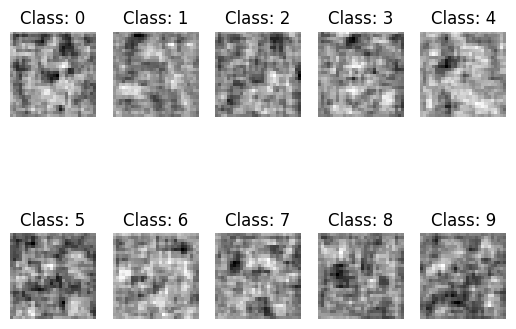

1/1 [==============================] - 0s 18ms/step
1 [D loss: 0.4375421702861786 | D accuracy: 50.0] [G loss: 0.3069705665111542]
1/1 [==============================] - 0s 19ms/step
2 [D loss: 0.4066477045416832 | D accuracy: 50.0] [G loss: 0.28439074754714966]
1/1 [==============================] - 0s 18ms/step
3 [D loss: 0.3834370616823435 | D accuracy: 50.0] [G loss: 0.30340564250946045]
1/1 [==============================] - 0s 19ms/step
4 [D loss: 0.37486447021365166 | D accuracy: 57.8125] [G loss: 0.2484697550535202]
1/1 [==============================] - 0s 19ms/step
5 [D loss: 0.35787686333060265 | D accuracy: 89.0625] [G loss: 0.2830338478088379]
1/1 [==============================] - 0s 19ms/step
6 [D loss: 0.3557088263332844 | D accuracy: 98.4375] [G loss: 0.2733996510505676]
1/1 [==============================] - 0s 21ms/step
7 [D loss: 0.3410911560058594 | D accuracy: 96.875] [G loss: 0.2695883512496948]
1/1 [==============================] - 0s 18ms/step
8 [D loss: 0.356

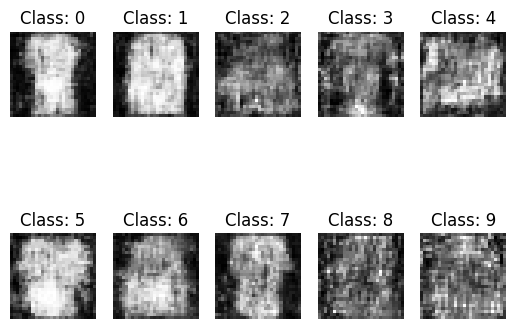

1/1 [==============================] - 0s 21ms/step
1001 [D loss: 0.43198224902153015 | D accuracy: 79.6875] [G loss: 1.183971643447876]
1/1 [==============================] - 0s 23ms/step
1002 [D loss: 0.4431234896183014 | D accuracy: 78.125] [G loss: 1.0920939445495605]
1/1 [==============================] - 0s 21ms/step
1003 [D loss: 0.4091625511646271 | D accuracy: 78.125] [G loss: 1.2056851387023926]
1/1 [==============================] - 0s 24ms/step
1004 [D loss: 0.5044400840997696 | D accuracy: 81.25] [G loss: 1.1389164924621582]
1/1 [==============================] - 0s 22ms/step
1005 [D loss: 0.4098550081253052 | D accuracy: 87.5] [G loss: 1.0883309841156006]
1/1 [==============================] - 0s 22ms/step
1006 [D loss: 0.5655824095010757 | D accuracy: 73.4375] [G loss: 1.1765029430389404]
1/1 [==============================] - 0s 30ms/step
1007 [D loss: 0.5137266516685486 | D accuracy: 75.0] [G loss: 1.202211618423462]
1/1 [==============================] - 0s 25ms/step


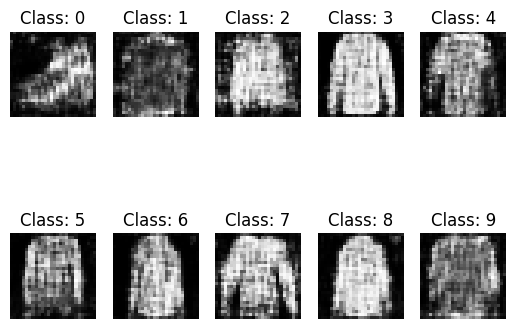

1/1 [==============================] - 0s 22ms/step
2001 [D loss: 0.5675278007984161 | D accuracy: 73.4375] [G loss: 1.4229490756988525]
1/1 [==============================] - 0s 23ms/step
2002 [D loss: 0.46934306621551514 | D accuracy: 79.6875] [G loss: 1.4821033477783203]
1/1 [==============================] - 0s 31ms/step
2003 [D loss: 0.4492032676935196 | D accuracy: 82.8125] [G loss: 1.3039700984954834]
1/1 [==============================] - 0s 24ms/step
2004 [D loss: 0.4589973986148834 | D accuracy: 75.0] [G loss: 1.4435961246490479]
1/1 [==============================] - 0s 30ms/step
2005 [D loss: 0.4984517991542816 | D accuracy: 76.5625] [G loss: 1.5241966247558594]
1/1 [==============================] - 0s 27ms/step
2006 [D loss: 0.4529486149549484 | D accuracy: 76.5625] [G loss: 1.4652631282806396]
1/1 [==============================] - 0s 21ms/step
2007 [D loss: 0.5087891668081284 | D accuracy: 70.3125] [G loss: 1.5212047100067139]
1/1 [==============================] - 0s 2

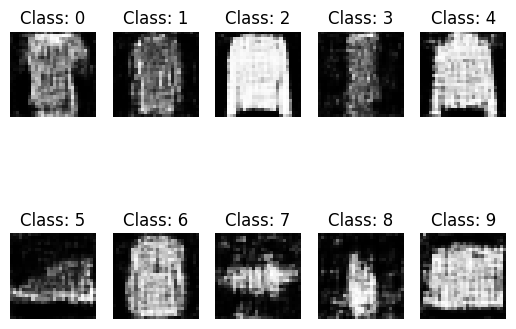

1/1 [==============================] - 0s 22ms/step
3001 [D loss: 0.4773150235414505 | D accuracy: 76.5625] [G loss: 1.2608263492584229]
1/1 [==============================] - 0s 25ms/step
3002 [D loss: 0.6584146022796631 | D accuracy: 57.8125] [G loss: 1.323370099067688]
1/1 [==============================] - 0s 24ms/step
3003 [D loss: 0.6632242798805237 | D accuracy: 59.375] [G loss: 1.3774456977844238]
1/1 [==============================] - 0s 19ms/step
3004 [D loss: 0.5482673048973083 | D accuracy: 73.4375] [G loss: 1.2770607471466064]
1/1 [==============================] - 0s 20ms/step
3005 [D loss: 0.5308398902416229 | D accuracy: 76.5625] [G loss: 1.3504719734191895]
1/1 [==============================] - 0s 29ms/step
3006 [D loss: 0.521356463432312 | D accuracy: 79.6875] [G loss: 1.1943333148956299]
1/1 [==============================] - 0s 20ms/step
3007 [D loss: 0.4616843909025192 | D accuracy: 76.5625] [G loss: 1.202246069908142]
1/1 [==============================] - 0s 21m

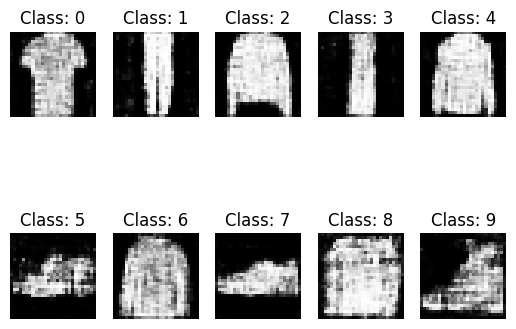

1/1 [==============================] - 0s 20ms/step
4001 [D loss: 0.600307047367096 | D accuracy: 64.0625] [G loss: 1.0868884325027466]
1/1 [==============================] - 0s 21ms/step
4002 [D loss: 0.6804942190647125 | D accuracy: 53.125] [G loss: 1.0684958696365356]
1/1 [==============================] - 0s 25ms/step
4003 [D loss: 0.544907346367836 | D accuracy: 79.6875] [G loss: 0.9046269655227661]
1/1 [==============================] - 0s 28ms/step
4004 [D loss: 0.677454799413681 | D accuracy: 54.6875] [G loss: 0.9414767026901245]
1/1 [==============================] - 0s 25ms/step
4005 [D loss: 0.6050240397453308 | D accuracy: 70.3125] [G loss: 1.056959867477417]
1/1 [==============================] - 0s 22ms/step
4006 [D loss: 0.5999174416065216 | D accuracy: 70.3125] [G loss: 1.0027600526809692]
1/1 [==============================] - 0s 25ms/step
4007 [D loss: 0.6373671889305115 | D accuracy: 64.0625] [G loss: 1.099116325378418]
1/1 [==============================] - 0s 21ms/

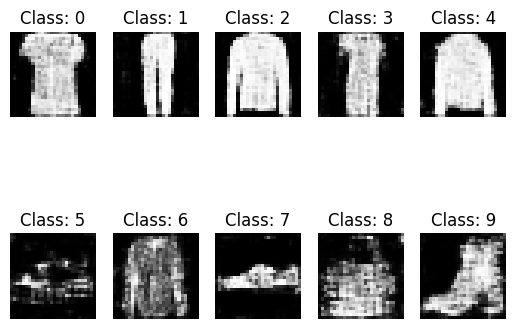

1/1 [==============================] - 0s 29ms/step
5001 [D loss: 0.5954570174217224 | D accuracy: 65.625] [G loss: 1.098480224609375]
1/1 [==============================] - 0s 27ms/step
5002 [D loss: 0.5985535383224487 | D accuracy: 68.75] [G loss: 0.9507220983505249]
1/1 [==============================] - 0s 30ms/step
5003 [D loss: 0.6464426517486572 | D accuracy: 60.9375] [G loss: 0.9080117344856262]
1/1 [==============================] - 0s 31ms/step
5004 [D loss: 0.6279181838035583 | D accuracy: 53.125] [G loss: 0.9523904323577881]
1/1 [==============================] - 0s 24ms/step
5005 [D loss: 0.5291509330272675 | D accuracy: 71.875] [G loss: 0.9500532150268555]
1/1 [==============================] - 0s 31ms/step
5006 [D loss: 0.6398449540138245 | D accuracy: 60.9375] [G loss: 1.0566136837005615]
1/1 [==============================] - 0s 27ms/step
5007 [D loss: 0.6044529974460602 | D accuracy: 67.1875] [G loss: 1.0046426057815552]
1/1 [==============================] - 0s 26ms/

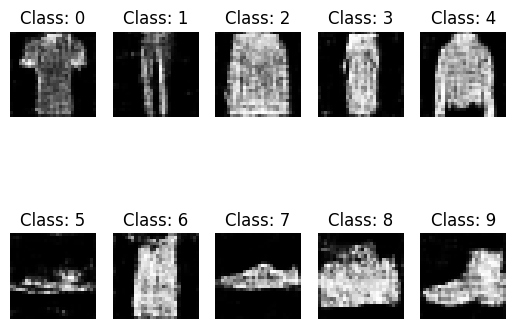

1/1 [==============================] - 0s 23ms/step
6001 [D loss: 0.6083514094352722 | D accuracy: 64.0625] [G loss: 1.0517048835754395]
1/1 [==============================] - 0s 23ms/step
6002 [D loss: 0.5881626009941101 | D accuracy: 65.625] [G loss: 0.9134794473648071]
1/1 [==============================] - 0s 30ms/step
6003 [D loss: 0.6215618252754211 | D accuracy: 65.625] [G loss: 0.9177294969558716]
1/1 [==============================] - 0s 29ms/step
6004 [D loss: 0.675763338804245 | D accuracy: 53.125] [G loss: 1.030627965927124]
1/1 [==============================] - 0s 44ms/step
6005 [D loss: 0.514678955078125 | D accuracy: 76.5625] [G loss: 1.0284024477005005]
1/1 [==============================] - 0s 26ms/step
6006 [D loss: 0.6485317945480347 | D accuracy: 56.25] [G loss: 0.9715368747711182]
1/1 [==============================] - 0s 30ms/step
6007 [D loss: 0.5916186571121216 | D accuracy: 71.875] [G loss: 0.9712370038032532]
1/1 [==============================] - 0s 27ms/ste

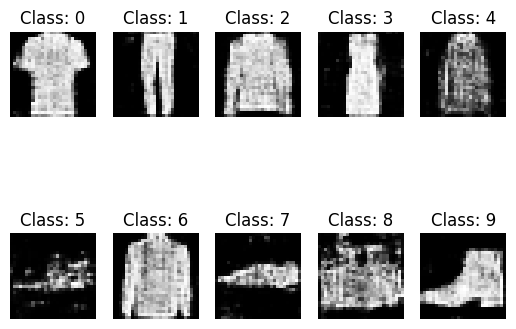

1/1 [==============================] - 0s 23ms/step
7001 [D loss: 0.531361848115921 | D accuracy: 78.125] [G loss: 1.029341459274292]
1/1 [==============================] - 0s 22ms/step
7002 [D loss: 0.5835525393486023 | D accuracy: 67.1875] [G loss: 1.0645477771759033]
1/1 [==============================] - 0s 27ms/step
7003 [D loss: 0.6568328142166138 | D accuracy: 56.25] [G loss: 0.9914678931236267]
1/1 [==============================] - 0s 30ms/step
7004 [D loss: 0.5485314428806305 | D accuracy: 76.5625] [G loss: 1.0435292720794678]
1/1 [==============================] - 0s 32ms/step
7005 [D loss: 0.6105828285217285 | D accuracy: 64.0625] [G loss: 1.0959608554840088]
1/1 [==============================] - 0s 35ms/step
7006 [D loss: 0.6534215211868286 | D accuracy: 54.6875] [G loss: 1.1386058330535889]
1/1 [==============================] - 0s 26ms/step
7007 [D loss: 0.5743148624897003 | D accuracy: 75.0] [G loss: 1.037414789199829]
1/1 [==============================] - 0s 35ms/ste

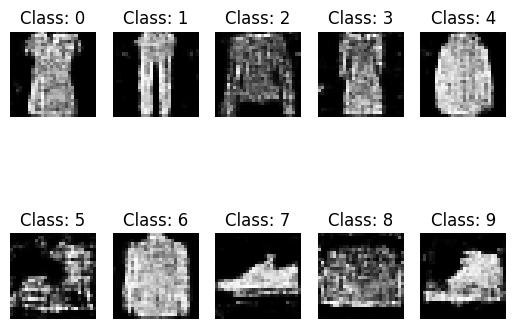

1/1 [==============================] - 0s 38ms/step
8001 [D loss: 0.5930418074131012 | D accuracy: 70.3125] [G loss: 1.0718010663986206]
1/1 [==============================] - 0s 21ms/step
8002 [D loss: 0.5981960892677307 | D accuracy: 70.3125] [G loss: 1.0803459882736206]
1/1 [==============================] - 0s 29ms/step
8003 [D loss: 0.5543470084667206 | D accuracy: 75.0] [G loss: 1.0722053050994873]
1/1 [==============================] - 0s 44ms/step
8004 [D loss: 0.45842142403125763 | D accuracy: 81.25] [G loss: 1.169593095779419]
1/1 [==============================] - 0s 22ms/step
8005 [D loss: 0.5666197538375854 | D accuracy: 71.875] [G loss: 1.1975347995758057]
1/1 [==============================] - 0s 42ms/step
8006 [D loss: 0.6588528156280518 | D accuracy: 73.4375] [G loss: 1.2024391889572144]
1/1 [==============================] - 0s 23ms/step
8007 [D loss: 0.5380474030971527 | D accuracy: 70.3125] [G loss: 1.215895652770996]
1/1 [==============================] - 0s 25ms/s

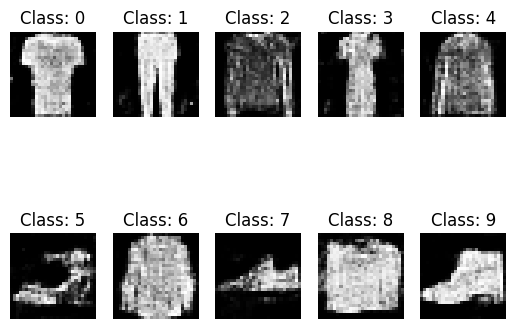

1/1 [==============================] - 0s 27ms/step
9001 [D loss: 0.5115512311458588 | D accuracy: 79.6875] [G loss: 1.0900466442108154]
1/1 [==============================] - 0s 27ms/step
9002 [D loss: 0.593209981918335 | D accuracy: 71.875] [G loss: 1.1861969232559204]
1/1 [==============================] - 0s 33ms/step
9003 [D loss: 0.49945735931396484 | D accuracy: 76.5625] [G loss: 1.1942391395568848]
1/1 [==============================] - 0s 31ms/step
9004 [D loss: 0.5282626152038574 | D accuracy: 78.125] [G loss: 1.1074442863464355]
1/1 [==============================] - 0s 42ms/step
9005 [D loss: 0.5556091666221619 | D accuracy: 71.875] [G loss: 1.3082001209259033]
1/1 [==============================] - 0s 30ms/step
9006 [D loss: 0.510313093662262 | D accuracy: 73.4375] [G loss: 1.1861555576324463]
1/1 [==============================] - 0s 36ms/step
9007 [D loss: 0.5743692517280579 | D accuracy: 64.0625] [G loss: 1.2281136512756348]
1/1 [==============================] - 0s 49m

In [22]:
from tensorflow.keras.optimizers import legacy as optimizers
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
generator = build_generator()
discriminator = build_discriminator()

# Use legacy Adam optimizer
optimizer = optimizers.Adam(0.0001, 0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

z = Input(shape=(100,))
label = Input(shape=(num_classes,))
img = generator([z, label])

discriminator.trainable = False
valid = discriminator([img, label])

combined = Model([z, label], valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

def train(epochs, batch_size=128, sample_interval=200):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        imgs, labels = x_train[idx], y_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        gen_imgs = generator.predict([noise, labels])

        valid = np.ones((half_batch, 1))
        fake = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch([imgs, labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, labels], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        labels = np.eye(num_classes)[np.random.choice(num_classes, batch_size)]

        valid = np.ones((batch_size, 1))
        g_loss = combined.train_on_batch([noise, labels], valid)

        # Print the progress
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

        # If at save interval, save generated image samples
        if epoch % sample_interval == 0:
            sample_images(epoch)

def sample_images(epoch):
    r, c = 2, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    sampled_labels = np.eye(num_classes)[np.arange(0, num_classes).reshape(-1)]

    gen_imgs = generator.predict([noise, sampled_labels])

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].set_title(f"Class: {cnt}")
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the GAN for 10,000 epochs with a batch size of 64
train(epochs=10000, batch_size=64, sample_interval=1000)


1/1 [==============================] - 0s 26ms/step


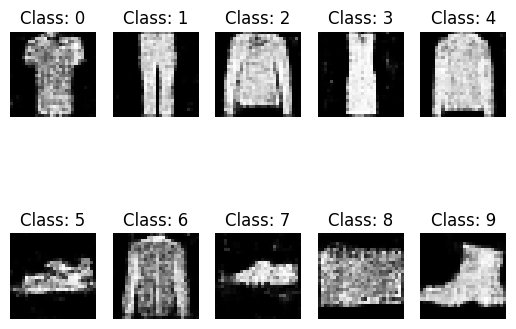

In [23]:
sample_images(epoch='final')


1/1 [==============================] - 0s 265ms/step


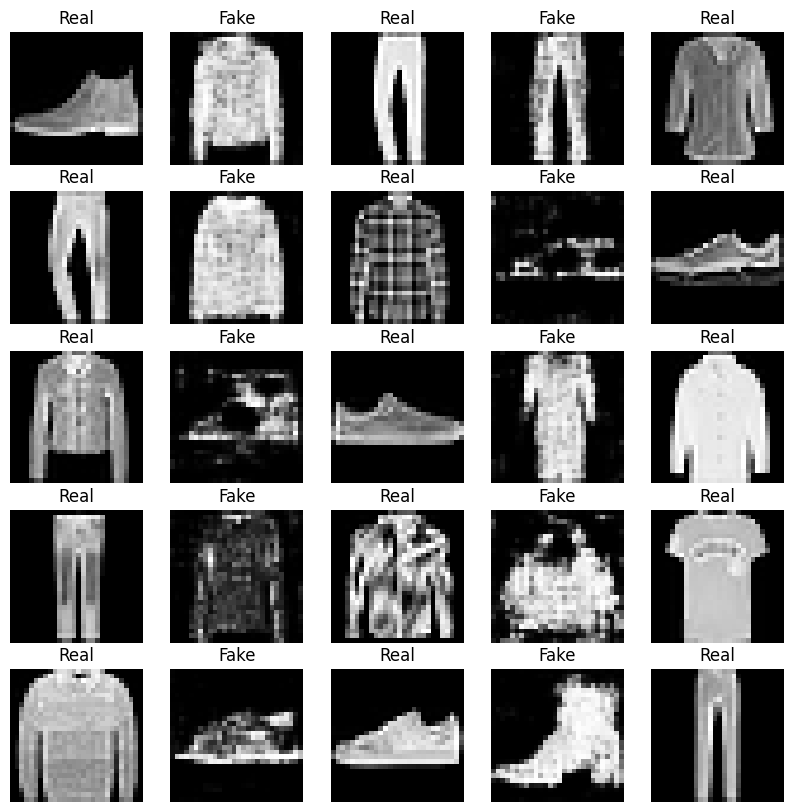

In [24]:
def visualize_real_vs_fake():
    r, c = 5, 5
    real_imgs = x_test[:r * c]
    real_labels = y_test[:r * c]

    noise = np.random.normal(0, 1, (r * c, 100))
    fake_imgs = generator.predict([noise, real_labels])

    real_imgs = 0.5 * real_imgs + 0.5
    fake_imgs = 0.5 * fake_imgs + 0.5

    fig, axs = plt.subplots(r, c, figsize=(10, 10))
    for i in range(r):
        for j in range(c):
            if j % 2 == 0:
                axs[i, j].imshow(real_imgs[i * c + j], cmap='gray')
                axs[i, j].set_title("Real")
            else:
                axs[i, j].imshow(fake_imgs[i * c + j], cmap='gray')
                axs[i, j].set_title("Fake")
            axs[i, j].axis('off')
    plt.show()

visualize_real_vs_fake()
